# CMSE 202 Final Project

## Modeling stock portfolios to maximize performance.

### &#9989; Yixiao Tang, Ishan Baweja,Zoe Zhang, Febri D
### &#9989; Section_002

In [118]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

## Introduction

We have found almost all the stock's data on nasdaq. To analyze this huge amount of data is too complicated and hard to get precise prediction. So, I am planning to 5 stocks from following list, and doing regression to predict buy and sell to maximize profit.

### stock dataset

In [119]:
#This cell inculde the uploading of the general stock info using pandas

stock_info=pd.read_csv('symbols_valid_meta.csv')                    # include 8048 stocks.
stock_info

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
3,Y,AACG,ATA Creativity Global - American Depositary Sh...,Q,G,N,100.0,N,N,NaN,AACG,N
4,Y,AADR,AdvisorShares Dorsey Wright ADR ETF,P,,Y,100.0,N,NaN,AADR,AADR,N
...,...,...,...,...,...,...,...,...,...,...,...,...
8044,Y,ZUO,"Zuora, Inc. Class A Common Stock",N,,N,100.0,N,NaN,ZUO,ZUO,N
8045,Y,ZVO,Zovio Inc. - Common Stock,Q,Q,N,100.0,N,N,NaN,ZVO,N
8046,Y,ZYME,Zymeworks Inc. Common Shares,N,,N,100.0,N,NaN,ZYME,ZYME,N
8047,Y,ZYNE,"Zynerba Pharmaceuticals, Inc. - Common Stock",Q,G,N,100.0,N,N,NaN,ZYNE,N


### stock indexs

In [182]:
#This cell of code includes the uploading of the specfic stock indexes and their quantitative data using pandas
stock_info2=pd.read_csv('data.csv')           
stock_info2

,GVKEY,datadate,fyear,tic,conm,curcd,at,bkvlps,ceq,ceql,...,prcc_f,gross profit,gp/at,asset turnover,gross margin,div /share,div yeild,if pro,if div,Unnamed: 33
0,138122.0,31-Dec-21,2021.0,ARNA,ARENA PHARMACEUTICALS INC,USD,784.705,10.9356,673.237,673.237,...,92.9400,-550.427,-0.701444492,6.88E-05,-10193.09259,0,0.0,FALSE,FALSE,NaN
1,313966.0,31-Dec-21,2021.0,NBTX,NANOBIOTIX SA,USD,115.745,0.8753,30.469,30.469,...,8.1000,-54.866,-0.474024796,0.000103676,-4572.166667,0,0.0,FALSE,FALSE,NaN
2,137090.0,31-Dec-21,2021.0,BLU,BELLUS HEALTH INC,USD,309.595,2.7449,292.029,292.029,...,8.0500,-73.091,-0.236085854,5.17E-05,-4568.1875,0,0.0,FALSE,FALSE,NaN
3,31628.0,31-Dec-21,2021.0,MRSN,MERSANA THRPEUTIC INC,USD,206.111,1.6516,121.741,121.741,...,6.2200,-168.003,-0.815109334,0.000208625,-3907.046512,0,0.0,FALSE,FALSE,NaN
4,37318.0,31-Dec-21,2021.0,FSR,FISKER INC,USD,1592.952,2.6962,800.042,800.042,...,15.7300,-328.450,-0.206189515,6.65E-05,-3098.584906,0,0.0,FALSE,FALSE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,315639.0,31-Dec-21,2021.0,CYAD,CELYAD ONCOLOGY SA,USD,90.921,2.1967,49.632,49.632,...,3.6600,0.000,0,0,#DIV/0!,0,0.0,#DIV/0!,FALSE,NaN
5140,320061.0,31-Dec-21,2021.0,BPTS,BIOPHYTIS SA,USD,41.242,0.4803,6.525,6.525,...,5.3400,0.000,0,0,#DIV/0!,0,0.0,#DIV/0!,FALSE,NaN
5141,322154.0,31-Dec-21,2021.0,ALLR,ALLARITY THERAPEUTICS INC,USD,49.633,2.2421,18.152,18.152,...,10.3745,0.000,0,0,#DIV/0!,0,0.0,#DIV/0!,FALSE,NaN
5142,324684.0,31-Dec-21,2021.0,ASLN,ASLAN PHARMACEUTIC,USD,94.518,0.8216,57.304,57.304,...,1.1200,0.000,0,0,#DIV/0!,0,0.0,#DIV/0!,FALSE,NaN


## Methodology

### The data used

This is the source we get the data. https://www.investing.com/equities/google-inc-historical-data

The data include stock price from 1/12018 to 11/25/2022. In each stock data include open price, highest price, lowest price,closed price and volume.

We also found the dataset which include important index which value the quality of stocks. We are going to use EPS to select 5 stocks from market.

Use machine learning to predict stock price

### Stock: SEB,NVR,MKL,BIO,GOOGL

## Code

#### Choose stock with highest EPS

In [135]:

stock_info2.nlargest(n=5, columns='epsfx')

,GVKEY,datadate,fyear,tic,conm,curcd,at,bkvlps,ceq,ceql,...,prcc_f,gross profit,gp/at,asset turnover,gross margin,div /share,div yeild,if pro,if div,Unnamed: 33
642,9538.0,31-Dec-21,2021.0,SEB,SEABOARD CORP,USD,7503.000,3803.6176,4416.000,4416.000,...,3935.01,996.000,0.132746901,1.230041317,0.107920685,8.613264427,0.002189,FALSE,1,NaN
1343,12459.0,31-Dec-21,2021.0,NVR,NVR INC,USD,5834.475,871.0119,3002.378,3002.378,...,5908.87,2226.410,0.381595602,1.537424018,0.248204527,0,0.000000,FALSE,FALSE,NaN
1481,12909.0,31-Dec-21,2021.0,MKL,MARKEL CORP,USD,48448.866,1033.9677,14103.157,14095.048,...,1234.00,3484.930,0.071930063,0.264970804,0.271464109,0,0.000000,FALSE,FALSE,NaN
3279,2220.0,31-Dec-21,2021.0,BIO,BIO-RAD LABORATORIES INC,USD,17775.795,456.6061,13667.134,13667.134,...,755.57,1762.589,0.09915669,0.162620125,0.609744277,0,0.000000,FALSE,FALSE,NaN
3311,160329.0,31-Dec-21,2021.0,GOOGL,ALPHABET INC,USD,359268.000,380.0438,251635.000,251635.000,...,2897.04,159128.000,0.442922832,0.71711647,0.617644205,0,0.000000,FALSE,FALSE,NaN


### Read stock dataframe

Now that we have found the stocks with the largest EPS, we will then set a variable for each the 5 stocks we have chosen to an individual data set for each stock

In [225]:
#Seeting variable
bio=pd.read_csv('BIO.csv')                   
googl_df=pd.read_csv('GOOGL.csv')
mkl=pd.read_csv('MKL.csv')
nvr=pd.read_csv('NVR.csv')
seb=pd.read_csv('SEB.csv')


In [215]:
googl_df = pd.read_csv("GOOGL.csv")
googl_df.set_index("Date", inplace=True)
googl_df.head()
googl_df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
01/02/2018,53.66,52.65,53.80,52.65,31.77M,1.88%
01/03/2018,54.58,53.70,54.80,53.67,31.32M,1.71%
01/04/2018,54.79,54.85,55.20,54.71,26.05M,0.38%
01/05/2018,55.51,55.17,55.68,55.09,30.25M,1.31%
01/08/2018,55.71,55.55,55.96,55.50,24.64M,0.36%
...,...,...,...,...,...,...
11/18/2022,97.43,98.77,98.90,96.37,28.34M,-0.95%
11/21/2022,95.60,97.29,98.39,95.36,21.50M,-1.88%
11/22/2022,97.05,95.89,97.22,94.09,23.04M,1.52%


C:\Users\Tang\AppData\Local\Temp\ipykernel_12280\786823300.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



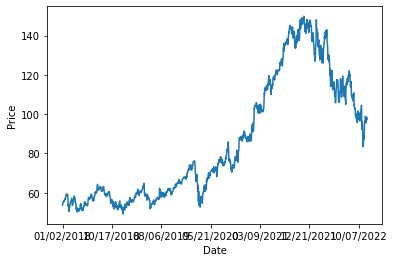

In [216]:
for i in range (1235):
    googl_df['Vol.'][i]=float(str(googl_df['Vol.'][i])[:-1])*1000000
googl_df['Price'].plot()
plt.ylabel("Price")
plt.show()

In [ ]:
x = googl_df.iloc[:, 1:5].values
y = googl_df.iloc[:, 0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,  random_state=0)
print(x)

In [218]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)
model = RandomForestRegressor(n_estimators=50, random_state=42, min_samples_split=22, min_samples_leaf=10, max_depth=100, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict.shape)


(309,)


In [219]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 0.7302
Mean Squared Error: 1.0745
Root Mean Squared Error: 1.0366
(R^2) Score: 0.9989
Train Score : 99.95% and Test Score : 99.89% using Random Tree Regressor.
Accuracy: 99.18 %.


In [220]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=googl_df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("google_predict.csv")

Buy price and date
    Unnamed: 0  Predictions
75  2023-02-08    51.166066
Sell price and date
     Unnamed: 0  Predictions
151  2023-04-25   147.507189


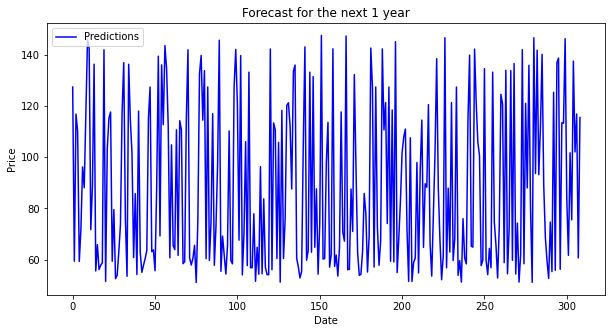

In [221]:
oneyear_df_pred = pd.read_csv("google_predict.csv")

buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### Predict BIO

C:\Users\Tang\AppData\Local\Temp\ipykernel_12280\700962039.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



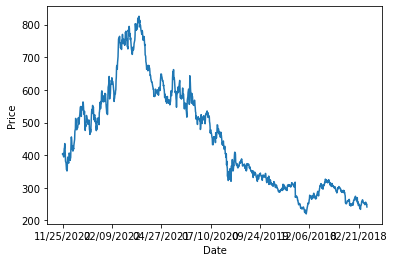

In [224]:
for i in range (1235):
    bio['Vol.'][i]=float(str(bio['Vol.'][i])[:-1])*1000000
bio['Price'].plot()
plt.ylabel("Price")
plt.show()

In [231]:
bio=pd.read_csv('BIO.csv') 

bio=bio.set_index('Date')
x = bio.iloc[:, 0:4].values
y = bio.iloc[:, 0].values

In [232]:
bio

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
01/02/2018,241.42,238.67,241.98,238.23,169.47K,1.15%
01/03/2018,250.47,242.34,251.85,242.34,233.22K,3.75%
01/04/2018,248.49,251.52,251.52,247.62,143.05K,-0.79%
01/05/2018,249.05,249.13,250.02,248.08,102.10K,0.23%
01/08/2018,251.00,248.52,251.88,247.41,233.90K,0.78%
...,...,...,...,...,...,...
11/18/2022,398.12,404.12,405.33,392.10,147.18K,0.90%
11/21/2022,398.17,395.56,401.00,392.46,199.07K,0.01%
11/22/2022,405.48,400.00,405.48,395.78,116.30K,1.84%


In [233]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,  random_state=0)

In [234]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [235]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 30, 'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 11, 'bootstrap': False}


In [236]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)


In [237]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 0.6175
Mean Squared Error: 1.2789
Root Mean Squared Error: 1.1309
(R^2) Score: 1.0
Train Score : 100.00% and Test Score : 100.00% using Random Tree Regressor.
Accuracy: 99.87 %.


In [238]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=bio.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")#colllects future days from predicted values
oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions.csv")
onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions.csv")
fivedays_df = pd.DataFrame(predictions[:5])
fivedays_df.to_csv("five-days-predictions.csv")

Buy price and date
     Unnamed: 0  Predictions
126  2023-03-31    224.82628
Sell price and date
     Unnamed: 0  Predictions
141  2023-04-15    813.56802


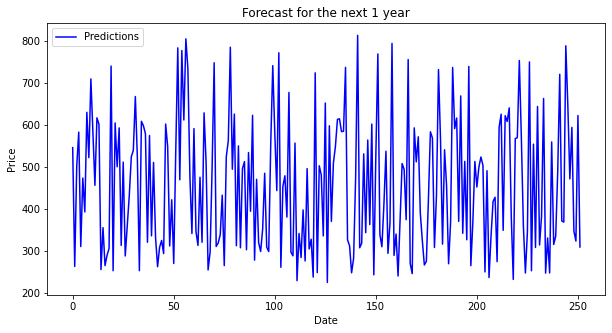

In [239]:
oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
#oneyear_df_pred.set_index("Date", inplace=True)
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5),title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## Planing to finish project

We are going to use regression knowledge that studied in this course to evaluate data.